# FIFA 2021 Statistics


## Players performances, age influence, key characterstics per positions, main foot  
. 

This notebook is covering 4 main studies: 

* Understand the key characteristics you need to be a good player at your position  
* Understand the age influence on the average level of a player 
* See if there is a significant difference between Left and Right main foot players
* Have an overview of the proportion of every position and more statistics about football players


![Alt text](https://sportslens.com/wp-content/uploads/2020/05/FIFA21.jpg)


First we import the necessary librairies

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 


Openning of the database with fifa 21 staticts about football players. The necessary columns are selected 

In [5]:
df=pd.read_csv("fifa21.csv")
cols=['Name', 'Age', 'OVA', 'Nationality', 'foot','Value','BP','Height','PAC','SHO','PAS','DRI','DEF','PHY']
df=df[cols]
df.head()

C:\Users\louas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Age,OVA,Nationality,foot,Value,BP,Height,PAC,SHO,PAS,DRI,DEF,PHY
0,G. Pasquale,33,69,Italy,Left,€625K,LWB,"6'0""",71,59,70,71,68,69
1,Luis García,37,71,Spain,Right,€600K,CM,"5'10""",53,69,73,69,58,63
2,J. Cole,33,71,England,Right,€1.1M,CAM,"5'9""",45,68,76,77,36,52
3,D. Yorke,36,68,Trinidad &amp; Tobago,Right,€0,ST,"5'11""",61,66,66,69,47,60
4,Iniesta,36,81,Spain,Right,€5.5M,CAM,"5'7""",58,70,85,85,63,59


Verification that the shape is normal, the data is not having unexpected data or missing data

In [6]:
df.shape


(17125, 14)

In [7]:
df.info

<bound method DataFrame.info of                   Name  Age  OVA            Nationality   foot  Value   BP  \
0          G. Pasquale   33   69                  Italy   Left  €625K  LWB   
1          Luis García   37   71                  Spain  Right  €600K   CM   
2              J. Cole   33   71                England  Right  €1.1M  CAM   
3             D. Yorke   36   68  Trinidad &amp; Tobago  Right     €0   ST   
4              Iniesta   36   81                  Spain  Right  €5.5M  CAM   
...                ...  ...  ...                    ...    ...    ...  ...   
17120       A. Medioub   22   64                 France  Right  €550K   CB   
17121       W. Rickard   18   56                  Wales  Right  €130K  CAM   
17122       C. Barrett   18   56                England  Right  €130K   RB   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  Right  €475K   RB   
17124  Pablo Rodríguez   18   59                  Spain  Right  €325K   ST   

      Height  PAC  SHO  PAS  DR

In [8]:
df.describe

<bound method NDFrame.describe of                   Name  Age  OVA            Nationality   foot  Value   BP  \
0          G. Pasquale   33   69                  Italy   Left  €625K  LWB   
1          Luis García   37   71                  Spain  Right  €600K   CM   
2              J. Cole   33   71                England  Right  €1.1M  CAM   
3             D. Yorke   36   68  Trinidad &amp; Tobago  Right     €0   ST   
4              Iniesta   36   81                  Spain  Right  €5.5M  CAM   
...                ...  ...  ...                    ...    ...    ...  ...   
17120       A. Medioub   22   64                 France  Right  €550K   CB   
17121       W. Rickard   18   56                  Wales  Right  €130K  CAM   
17122       C. Barrett   18   56                England  Right  €130K   RB   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  Right  €475K   RB   
17124  Pablo Rodríguez   18   59                  Spain  Right  €325K   ST   

      Height  PAC  SHO  PAS  

We need to make sur the int object in the database are really int and are not hiding some texts 

In [9]:
df.dtypes


Name           object
Age             int64
OVA             int64
Nationality    object
foot           object
Value          object
BP             object
Height         object
PAC             int64
SHO             int64
PAS             int64
DRI             int64
DEF             int64
PHY             int64
dtype: object

# Age statistics
We take first stats about the age of the players over the 17125 players, it gives an idea about the age repartition


In [10]:
df['Age'].describe()

count    17125.000000
mean        25.272934
std          4.942665
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         53.000000
Name: Age, dtype: float64

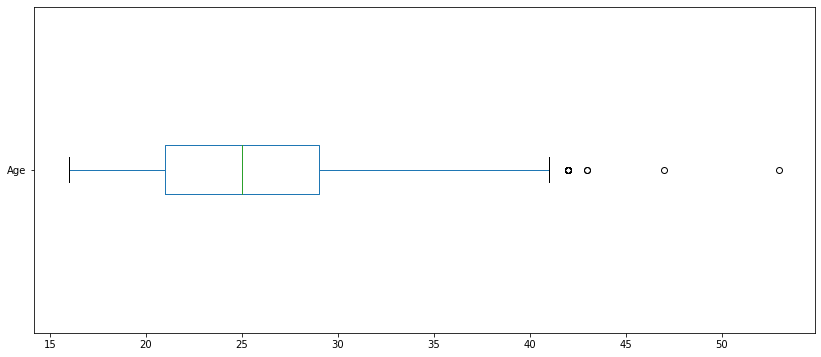

In [11]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

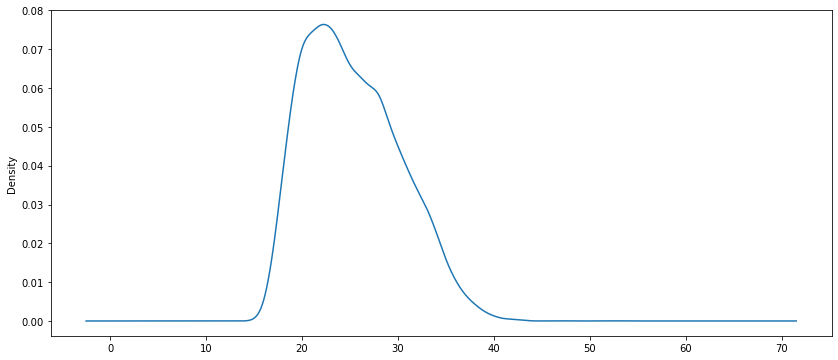

In [12]:

df['Age'].plot(kind='density', figsize=(14,6))

# Nationality repartition

In [13]:
df['Nationality'].value_counts()


England              1707
Germany              1154
Spain                1121
France                990
Brazil                857
                     ... 
Eritrea                 1
Papua New Guinea        1
Brunei Darussalam       1
Saint Lucia             1
Suriname                1
Name: Nationality, Length: 167, dtype: int64

# Role within the team repartition over all players

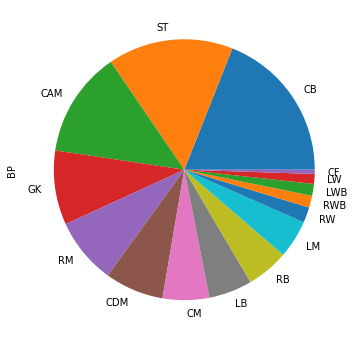

In [14]:
df['BP'].value_counts().plot(kind='pie', figsize=(6,6))

# Values of players regarding their positions - role

Text(0.5, 0, ' Main Position')

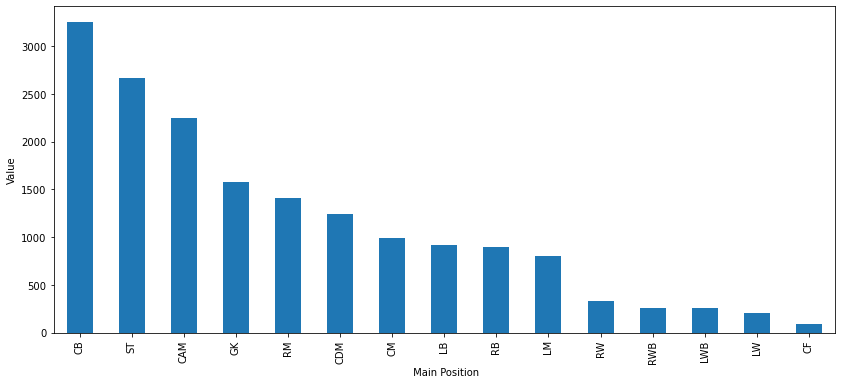

In [15]:
ax = df['BP'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Value')
ax.set_xlabel(' Main Position')

# Study of the more intresting statistics to have to be a good player at a specific position : CENTER BACK case 

In [16]:
df[df['BP'] == 'CB'] # keep only Center Back

,Name,Age,OVA,Nationality,foot,Value,BP,Height,PAC,SHO,PAS,DRI,DEF,PHY
8,G. Neville B,35,76,England,Right,€0,CB,"5'10""",67,36,67,53,81,74
10,P. Neville,35,74,England,Right,€120K,CB,"5'11""",51,53,67,62,76,72
13,S. Campbell,35,75,England,Right,€0,CB,"6'2""",65,34,43,48,76,81
15,D. Hamann,36,61,Germany,Right,€0,CB,"6'2""",42,51,68,46,69,67
24,A. Nesta,37,73,Italy,Right,€0,CB,"6'2""",41,32,54,58,75,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17107,F. Boyomo,18,60,France,Right,€400K,CB,"6'0""",65,30,38,39,62,62
17108,I. Kébé,19,63,Mali,Right,€525K,CB,"6'1""",65,46,55,57,60,74
17112,A. Hajdari,17,53,Switzerland,Left,€120K,CB,"6'2""",60,25,30,29,53,62
17116,J. Lawrence,17,52,Germany,Right,€100K,CB,"6'7""",61,21,30,32,50,67


Creation of the correlation matrix to find the most interesting abilities to have for the CB position

In [17]:

corr = df[df['BP'] == 'CB'].corr() #Correlation matrix for CB player
corr

,Age,OVA,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.529787,-0.374353,0.418593,0.423466,0.266976,0.509335,0.439908
OVA,0.529787,1.000000,0.035674,0.490978,0.675991,0.605239,0.974365,0.693040
PAC,-0.374353,0.035674,1.000000,0.019984,0.124825,0.316408,-0.002463,0.028055
SHO,0.418593,0.490978,0.019984,1.000000,0.744756,0.632755,0.444529,0.399330
PAS,0.423466,0.675991,0.124825,0.744756,1.000000,0.837384,0.622326,0.438624
DRI,0.266976,0.605239,0.316408,0.632755,0.837384,1.000000,0.550097,0.377414
DEF,0.509335,0.974365,-0.002463,0.444529,0.622326,0.550097,1.000000,0.586623
PHY,0.439908,0.693040,0.028055,0.399330,0.438624,0.377414,0.586623,1.000000


We plot the correlatino matrix

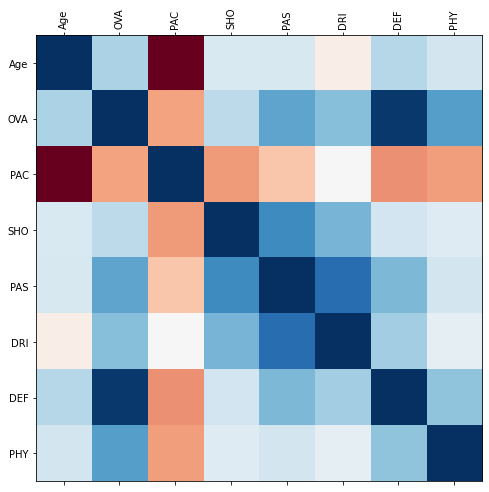

In [18]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# Study of the more intresting statistics to have to be a good player at a specific position : Striker case 

In [19]:

corr = df[df['BP'] == 'ST'].corr() #Correlation matrix for Striker player
corr

,Age,OVA,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.547278,-0.251718,0.559174,0.530413,0.362393,0.432623,0.510871
OVA,0.547278,1.000000,0.152345,0.955968,0.795983,0.853714,0.468753,0.627509
PAC,-0.251718,0.152345,1.000000,0.023530,0.133801,0.389449,-0.017636,-0.023109
SHO,0.559174,0.955968,0.023530,1.000000,0.758879,0.780660,0.426792,0.559430
PAS,0.530413,0.795983,0.133801,0.758879,1.000000,0.788968,0.579903,0.455294
DRI,0.362393,0.853714,0.389449,0.780660,0.788968,1.000000,0.384221,0.379788
DEF,0.432623,0.468753,-0.017636,0.426792,0.579903,0.384221,1.000000,0.496999
PHY,0.510871,0.627509,-0.023109,0.559430,0.455294,0.379788,0.496999,1.000000


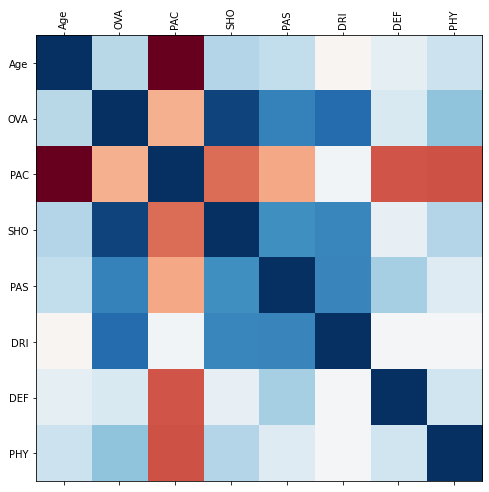

In [20]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# Study of the more intresting statistics to have to be a good player at a specific position : Goal Keeper case 

In [21]:

corr = df[df['BP'] == 'GK'].corr() #Correlation matrix for Goal Keeper player
corr

,Age,OVA,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.527505,0.445297,0.506238,0.413328,0.418761,0.357883,0.587052
OVA,0.527505,1.000000,0.953128,0.938328,0.784211,0.948738,0.496896,0.945512
PAC,0.445297,0.953128,1.000000,0.862122,0.724932,0.924916,0.488596,0.861987
SHO,0.506238,0.938328,0.862122,1.000000,0.746493,0.846288,0.429385,0.894398
PAS,0.413328,0.784211,0.724932,0.746493,1.000000,0.708991,0.417897,0.737779
DRI,0.418761,0.948738,0.924916,0.846288,0.708991,1.000000,0.484203,0.853994
DEF,0.357883,0.496896,0.488596,0.429385,0.417897,0.484203,1.000000,0.439938
PHY,0.587052,0.945512,0.861987,0.894398,0.737779,0.853994,0.439938,1.000000


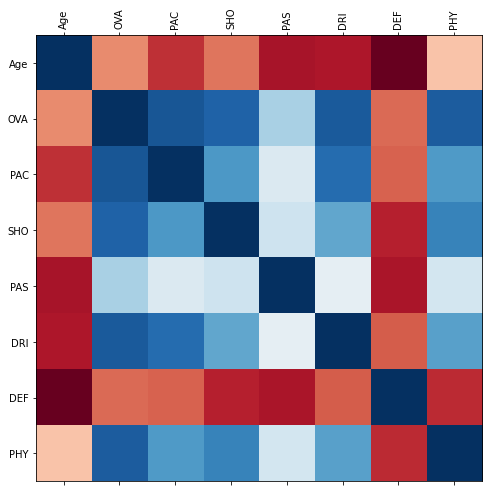

In [22]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# Study of the more intresting statistics to have to be a good player at a specific position : Right wing case 

In [23]:
corr = df[df['BP'] == 'RW'].corr() #Correlation matrix for Goal Keeper player
corr

,Age,OVA,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.436189,-0.007214,0.488122,0.540480,0.349068,0.348135,0.476731
OVA,0.436189,1.000000,0.349613,0.894633,0.908605,0.928702,0.431723,0.498009
PAC,-0.007214,0.349613,1.000000,0.209543,0.096315,0.349675,0.080279,0.234437
SHO,0.488122,0.894633,0.209543,1.000000,0.850873,0.803825,0.376696,0.525399
PAS,0.540480,0.908605,0.096315,0.850873,1.000000,0.799802,0.483203,0.482989
DRI,0.349068,0.928702,0.349675,0.803825,0.799802,1.000000,0.370220,0.341108
DEF,0.348135,0.431723,0.080279,0.376696,0.483203,0.370220,1.000000,0.430682
PHY,0.476731,0.498009,0.234437,0.525399,0.482989,0.341108,0.430682,1.000000


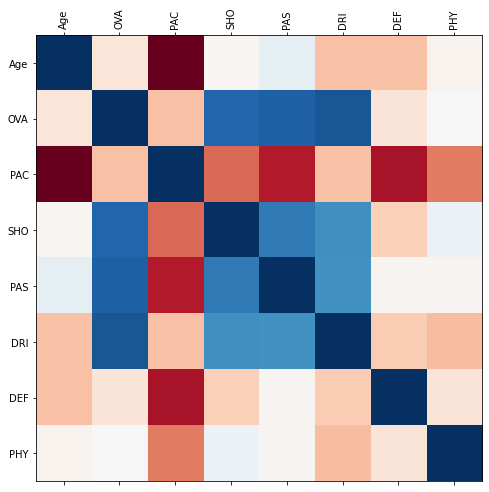

In [24]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# Comparaison of the average score between Left and Right main foot players

First we get the average value for right main foot players

In [26]:
df.loc[(df['foot'] == 'Right'), 'OVA'].mean() # right foot average player

66.89880675654734

Then we compare it to the left main foot players. The difference isn't significant

In [27]:
df.loc[(df['foot'] == 'Left'), 'OVA'].mean() # left foot average player 

67.16757525479971

# Study of the evolution of the average level regarding players's ages

Text(0, 0.5, 'OVA')

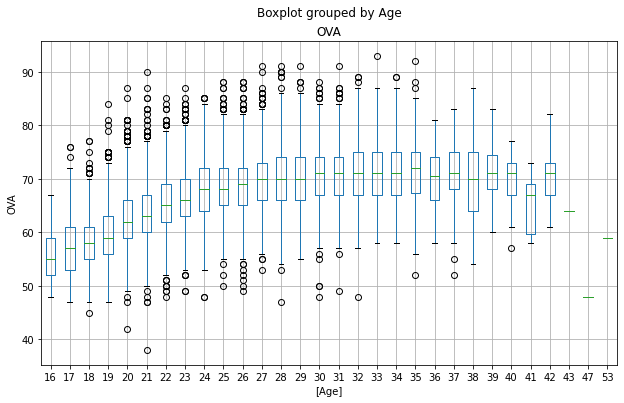

In [28]:
ax = df[['OVA', 'Age']].boxplot(by='Age', figsize=(10,6))
ax.set_ylabel('OVA')


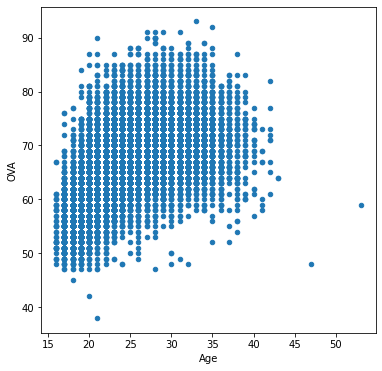

In [29]:
df.plot(kind='scatter', x='Age', y='OVA', figsize=(6,6))

# Are some positions having better average scores?

Text(0, 0.5, 'OVA')

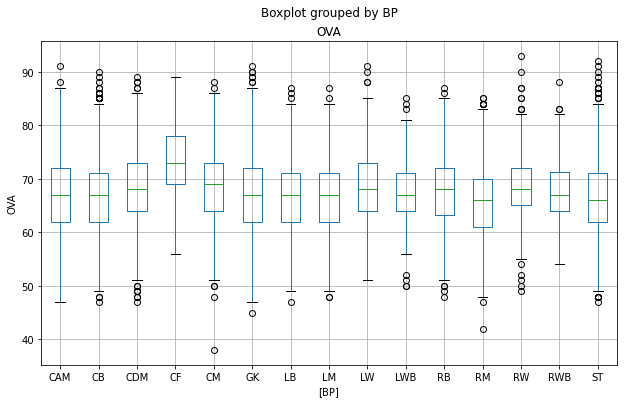

In [30]:

ax = df[['OVA', 'BP']].boxplot(by='BP', figsize=(10,6)) # niveau moyen des joueurs en fonction des positions
ax.set_ylabel('OVA')


With the first plot it seems there is not significant difference, but is there a difference when studying the super stars players ( score > 84 => 109 best players) 


In [31]:

dt =df[df.OVA > 84]
dt.shape


(109, 14)

Plot of the scores regarding the position, we can see that ST,RW,LW and GK are more represented in the very top players

Text(0, 0.5, 'OVA')

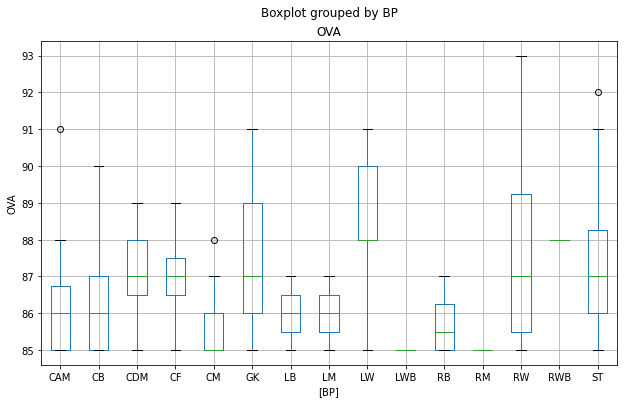

In [32]:

ax = dt[['OVA', 'BP']].boxplot(by='BP', figsize=(10,6)) # niveau moyen des joueurs en fonction des positions
ax.set_ylabel('OVA') # repartition of the role of super player ( OVA > 84)
